<a href="https://colab.research.google.com/github/Binal98/testrepo/blob/main/Crane_Idle_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# Upload Excel file
uploaded = files.upload()

Saving EcEvent_20250627_1805.xlsx to EcEvent_20250627_1805.xlsx


In [ ]:
excel = list(uploaded.keys())[0]

# Load the first sheet into a named DataFrame
df = pd.read_excel(excel)

# Show first 10 rows
print(df.head(10))

        Timestamp POW Name Ops Position Id Che Name Move kind  \
0  25-May-28 1802    STS04    QCTP.STS04.4    EP010      LOAD   
1  25-May-28 1803    STS06    QCTP.STS06.6    EP042      LOAD   
2  25-May-28 1803    STS04    QCTP.STS04.4    EP022      LOAD   
3  25-May-28 1803    STS06    QCTP.STS06.6    EP041      LOAD   
4  25-May-28 1803    STS05    QCTP.STS05.5    EP016      LOAD   
5  25-May-28 1805    STS03    QCTP.STS04.4    EP022      LOAD   
6  25-May-28 1806    STS03    QCTP.STS01.1    EP034      LOAD   
7  25-May-28 1806    STS01    QCTP.STS01.1    EP011      LOAD   
8  25-May-28 1806    STS04    QCTP.STS04.4    EP045      LOAD   
9  25-May-28 1808    STS05    QCTP.STS05.5    EP002      LOAD   

  Type Description      Unit Id                 Work Queue Is Twin Move?  
0             EXLN          NaN    T4Q-load-25A (40s Only)            No  
1             EXLN          NaN    T4Q-load-05A (40s Only)            No  
2             AVDR  MRKU2026327    T4Q-load-25A (40s Only) 

In [ ]:
# Strip whitespace from column headers
df.columns = df.columns.str.strip()

# Show column names
print("\n🧹 Cleaned column names:")
print(df.columns.tolist())


🧹 Cleaned column names:
['Timestamp', 'POW Name', 'Ops Position Id', 'Che Name', 'Move kind', 'Type Description', 'Unit Id', 'Work Queue', 'Is Twin Move?']


In [ ]:
# Show first 10 rows
print(df.head(10))


        Timestamp POW Name Ops Position Id Che Name Move kind  \
0  25-May-28 1802    STS04    QCTP.STS04.4    EP010      LOAD   
1  25-May-28 1803    STS06    QCTP.STS06.6    EP042      LOAD   
2  25-May-28 1803    STS04    QCTP.STS04.4    EP022      LOAD   
3  25-May-28 1803    STS06    QCTP.STS06.6    EP041      LOAD   
4  25-May-28 1803    STS05    QCTP.STS05.5    EP016      LOAD   
5  25-May-28 1805    STS03    QCTP.STS04.4    EP022      LOAD   
6  25-May-28 1806    STS03    QCTP.STS01.1    EP034      LOAD   
7  25-May-28 1806    STS01    QCTP.STS01.1    EP011      LOAD   
8  25-May-28 1806    STS04    QCTP.STS04.4    EP045      LOAD   
9  25-May-28 1808    STS05    QCTP.STS05.5    EP002      LOAD   

  Type Description      Unit Id                 Work Queue Is Twin Move?  
0             EXLN          NaN    T4Q-load-25A (40s Only)            No  
1             EXLN          NaN    T4Q-load-05A (40s Only)            No  
2             AVDR  MRKU2026327    T4Q-load-25A (40s Only) 

In [ ]:
# Convert to datetime and split
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%y-%b-%d %H%M', errors='coerce')
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

# Remove original Timestamp column
df.drop(columns=['Timestamp'], inplace=True)

# Show updated first 10 rows
print("\n✅ First 10 rows with Date and Time separated:")
print(df.head(10))


✅ First 10 rows with Date and Time separated:
  POW Name Ops Position Id Che Name Move kind Type Description      Unit Id  \
0    STS04    QCTP.STS04.4    EP010      LOAD             EXLN          NaN   
1    STS06    QCTP.STS06.6    EP042      LOAD             EXLN          NaN   
2    STS04    QCTP.STS04.4    EP022      LOAD             AVDR  MRKU2026327   
3    STS06    QCTP.STS06.6    EP041      LOAD             AVDR  SUDU8772329   
4    STS05    QCTP.STS05.5    EP016      LOAD             EXLN          NaN   
5    STS03    QCTP.STS04.4    EP022      LOAD             EXLN          NaN   
6    STS03    QCTP.STS01.1    EP034      LOAD             EXLN          NaN   
7    STS01    QCTP.STS01.1    EP011      LOAD             AVDR  MVIU0014458   
8    STS04    QCTP.STS04.4    EP045      LOAD             AVDR  CAAU9104411   
9    STS05    QCTP.STS05.5    EP002      LOAD             AVDR  CAAU5238475   

                  Work Queue Is Twin Move?        Date      Time  
0    T4Q-load-25

In [ ]:
# Keep only relevant rows
valid_types = ['AVDR', 'AVCO', 'EXLN']
df_filtered = df[df['Type Description'].isin(valid_types)].copy()

# Convert Date + Time to single datetime column for sorting
df_filtered['DateTime'] = pd.to_datetime(df_filtered['Date'].astype(str) + ' ' + df_filtered['Time'].astype(str))

# Sort by POW Name, Che Name, and DateTime to group correctly
df_filtered.sort_values(by=['POW Name', 'Che Name', 'DateTime'], inplace=True)

# Reset index after sorting
df_filtered.reset_index(drop=True, inplace=True)

In [ ]:
idle_times = []
records = []

# Group by crane
for crane_id, group in df_filtered.groupby('POW Name'):
    group_sorted = group.sort_values(by='DateTime').reset_index(drop=True)

    for i in range(len(group_sorted) - 1):
        current = group_sorted.iloc[i]
        next_ = group_sorted.iloc[i + 1]

        is_exit = current['Type Description'] == 'EXLN'
        is_arrival = next_['Type Description'] in ['AVDR', 'AVCO']
        same_crane = current['POW Name'] == next_['POW Name']
        same_ops_id = current['Ops Position Id'] == next_['Ops Position Id']
        same_queue = current['Work Queue'] == next_['Work Queue']

        valid_ops_id = pd.notna(current['Ops Position Id']) and pd.notna(next_['Ops Position Id'])
        valid_queue = pd.notna(current['Work Queue']) and pd.notna(next_['Work Queue'])

        if is_exit and is_arrival and same_crane and same_ops_id and same_queue and valid_ops_id and valid_queue:
            idle_min = (next_['DateTime'] - current['DateTime']).total_seconds() / 60

            if 0 <= idle_min < 240:  # realistic idle times
                idle_times.append(idle_min)
                records.append({
                    'POW Name': crane_id,
                    'Ops Position Id': current['Ops Position Id'],
                    'Work Queue': current['Work Queue'],
                    'From Truck': current['Che Name'],
                    'Exit Time': current['DateTime'],
                    'To Truck': next_['Che Name'],
                    'Next Arrival': next_['DateTime'],
                    'Idle Time (min)': idle_min
                })


In [ ]:
idle_df = pd.DataFrame(records)

print("✅ First 10 Crane Idle Records with Ops Position Id + Work Queue:")
print(idle_df.head(10))

# Optional: list of idle times
print("\n🕒 Idle times (in minutes) list:")
print(idle_times[:10])



✅ First 10 Crane Idle Records with Ops Position Id + Work Queue:
  POW Name Ops Position Id                 Work Queue From Truck  \
0    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP011   
1    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP015   
2    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP015   
3    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP045   
4    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP036   
5    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP015   
6    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP033   
7    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP032   
8    STS01    QCTP.STS01.1  T4Q-load-65A (40s Only):1      EP037   
9    STS01    QCTP.STS01.1  T4Q-load-53A (40s Only):1      EP032   

            Exit Time To Truck        Next Arrival  Idle Time (min)  
0 2025-05-28 18:27:00    EP019 2025-05-28 18:27:00              0.0  
1 2025-05-28 18:46:00    EP045 2025-05-28 18:4

In [ ]:
# Install openpyxl (for Excel support if not installed)
!pip install openpyxl

# Export idle_df to Excel
idle_df.to_excel("crane_idle_times.xlsx", index=False)

# Download the file
from google.colab import files
files.download("crane_idle_times.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Extract first 3 letters of Work Queue as Vessel Code
idle_df['Vessel Code'] = idle_df['Work Queue'].astype(str).str[:3]

# Step 2: Ensure Exit Time is datetime format (if not already)
idle_df['Exit Time'] = pd.to_datetime(idle_df['Exit Time'], format='%d-%b-%y %H%M', errors='coerce')

# Step 3: Extract date from Exit Time
idle_df['Date'] = idle_df['Exit Time'].dt.date

# Step 4: Group by Crane and Vessel Code to calculate average idle time
avg_idle_by_crane_vessel = idle_df.groupby(['POW Name', 'Vessel Code'])['Idle Time (min)'].mean().reset_index()

# Step 5: Get the first Exit Date per group
first_date_per_group = idle_df.groupby(['POW Name', 'Vessel Code'])['Date'].min().reset_index()

# Step 6: Merge average idle data with date
avg_idle_with_date = pd.merge(avg_idle_by_crane_vessel, first_date_per_group, on=['POW Name', 'Vessel Code'])

# Step 7: Preview the final result
print(avg_idle_with_date.head())


  POW Name Vessel Code  Idle Time (min)        Date
0    STS01         8XF         1.385475  2025-06-25
1    STS01         AMA         1.324074  2025-06-03
2    STS01         CSU         0.800000  2025-06-16
3    STS01         EAM         1.300971  2025-06-09
4    STS01         EVD         2.205128  2025-06-13


In [ ]:
# Step 8: Export the final dataframe to Excel
output_filename = "Average_Idle_Time_by_Crane_and_Vessel.xlsx"
avg_idle_with_date.to_excel(output_filename, index=False)

# Step 9: Download the file
from google.colab import files
files.download(output_filename)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Load the file (auto-picks uploaded filename)
filename = list(uploaded.keys())[0]
df = pd.read_excel(filename)

# Preview
df.head()


Saving Average_Idle_Time_by_Crane_and_Vessel.xlsx to Average_Idle_Time_by_Crane_and_Vessel (1).xlsx


,POW Name,Vessel Code,Idle Time (min),Date
0,STS01,8XF,1.385475,2025-06-25
1,STS01,AMA,1.324074,2025-06-03
2,STS01,CSU,0.800000,2025-06-16
3,STS01,EAM,1.300971,2025-06-09
4,STS01,EVD,2.205128,2025-06-13


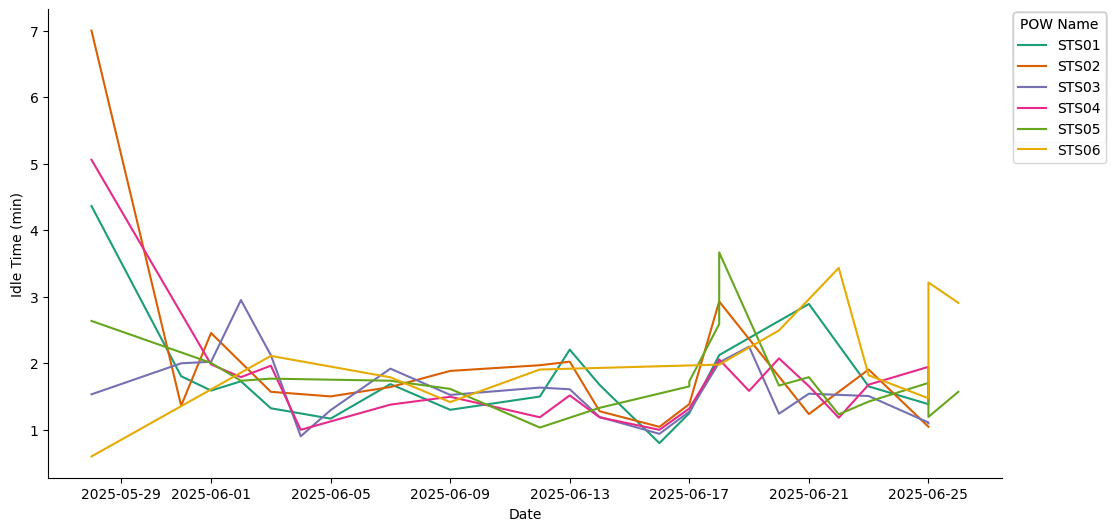

In [ ]:
# @title Date vs Idle Time (min)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Idle Time (min)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('POW Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='POW Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Idle Time (min)')

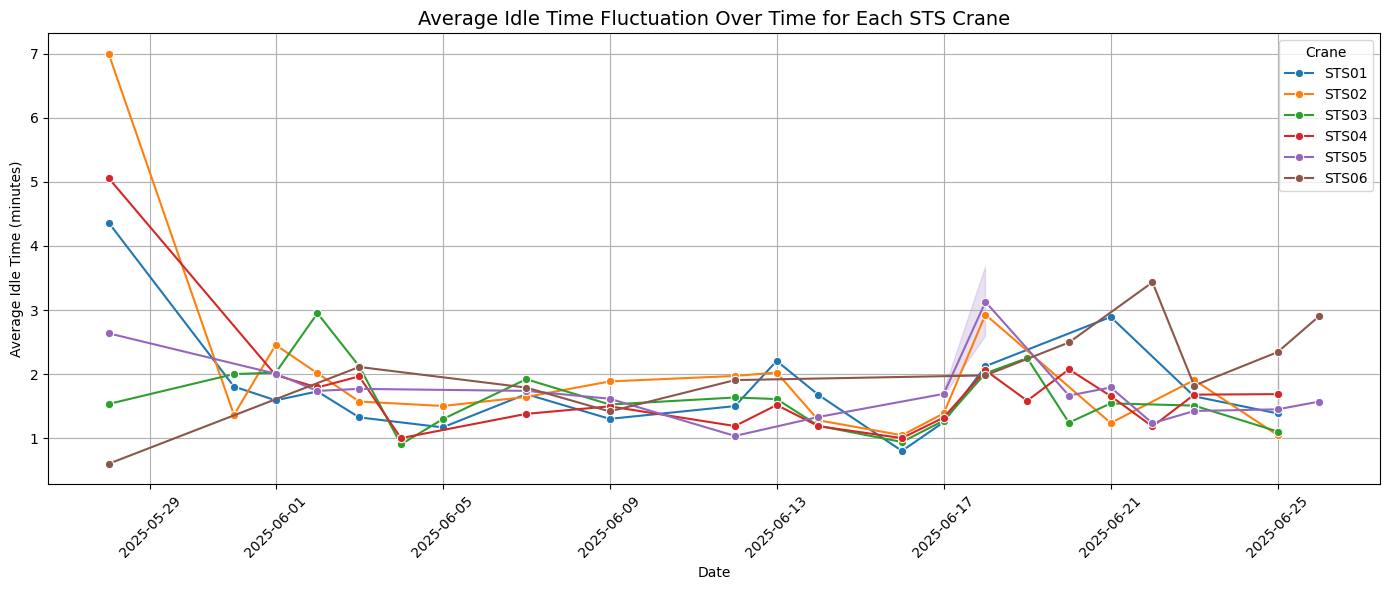

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Idle Time (min)', hue='POW Name', marker='o')

plt.title("Average Idle Time Fluctuation Over Time for Each STS Crane", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Idle Time (minutes)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Crane')
plt.show()

In [ ]:
# Ensure 'Exit Time' is in datetime format
idle_df['Exit Time'] = pd.to_datetime(idle_df['Exit Time'], errors='coerce')

# Create a 'Date' column
idle_df['Date'] = idle_df['Exit Time'].dt.date

# 1️⃣ Daily average idle time per STS (crane)
daily_avg_by_crane = (
    idle_df.groupby(['POW Name', 'Date'])['Idle Time (min)']
    .mean()
    .reset_index()
    .rename(columns={'Idle Time (min)': 'Avg Idle Time (min)'})
)

# 2️⃣ Daily average idle time for all STSs combined
daily_avg_all_sts = (
    idle_df.groupby(['Date'])['Idle Time (min)']
    .mean()
    .reset_index()
    .rename(columns={'Idle Time (min)': 'Avg Idle Time (min)'})
)
daily_avg_all_sts['POW Name'] = 'ALL STSs'  # Tag for merged table

# 3️⃣ Combine both into one DataFrame
combined_daily_avg = pd.concat([daily_avg_by_crane, daily_avg_all_sts], ignore_index=True)
combined_daily_avg.sort_values(by=['Date', 'POW Name'], inplace=True)

# 4️⃣ Export to Excel
combined_daily_avg.to_excel('Daily_Average_Idle_Time.xlsx', index=False)

# 5️⃣ If using Google Colab, download the file
from google.colab import files
files.download('Daily_Average_Idle_Time.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
os.listdir()


['.config',
 'crane_idle_times.xlsx',
 'Average_Idle_Time_by_Crane_and_Vessel.xlsx',
 'crane_idle_times (1).xlsx',
 'Daily_Average_Idle_Time.xlsx',
 'avg_idle_time_by_crane_and_vessel.xlsx',
 'EcEvent_20250627_1805.xlsx',
 'Average_Idle_Time_by_Crane_and_Vessel (1).xlsx',
 'sample_data']